# PIMA INDIANS DIABETES EDA AND PREDICTION:

# INRODUCTION: 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases

# Objective:
The dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has their BMI, insulin level, age, and so on


# PROBLEM STATEMENT:
    To build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Step1: Importing Libraries

In [17]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#panda used to read data from a CSV file and manipulate.
#numpy to convert out data into a format suitable to feed our classification model. 
#seaborn and matplotlib for visualizations

# Data description
We first read our dataset into a pandas dataframe called diabetes, and then use the head() function to show the first five records from our dataset

In [19]:
diabetes = pd.read_csv('pima-indians-diabetesdata.csv')
print(diabetes.shape)
diabetes.head(5)

(768, 9)


,Pregnancies,Glucose,Blood Pressure,Triceps Skin,Insulin,BML,Diabetes pedigree,Age,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# The following features have been provided to help us predict whether a person is diabetic or not:
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age: Age (years)
Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [20]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   Blood Pressure     768 non-null    int64  
 3   Triceps Skin       768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BML                768 non-null    float64
 6   Diabetes pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   OUTCOME            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
# Statistical summary
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BML,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
OUTCOME,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [22]:
# Count of null values
diabetes.isnull().sum()

Pregnancies          0
Glucose              0
Blood Pressure       0
Triceps Skin         0
Insulin              0
BML                  0
Diabetes pedigree    0
Age                  0
OUTCOME              0
dtype: int64

# Step 2: Data Visualization

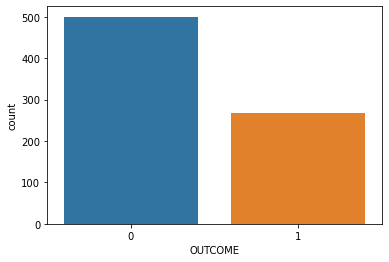

In [26]:
# Outcome countplot
sns.countplot(x = 'OUTCOME',data = diabetes)

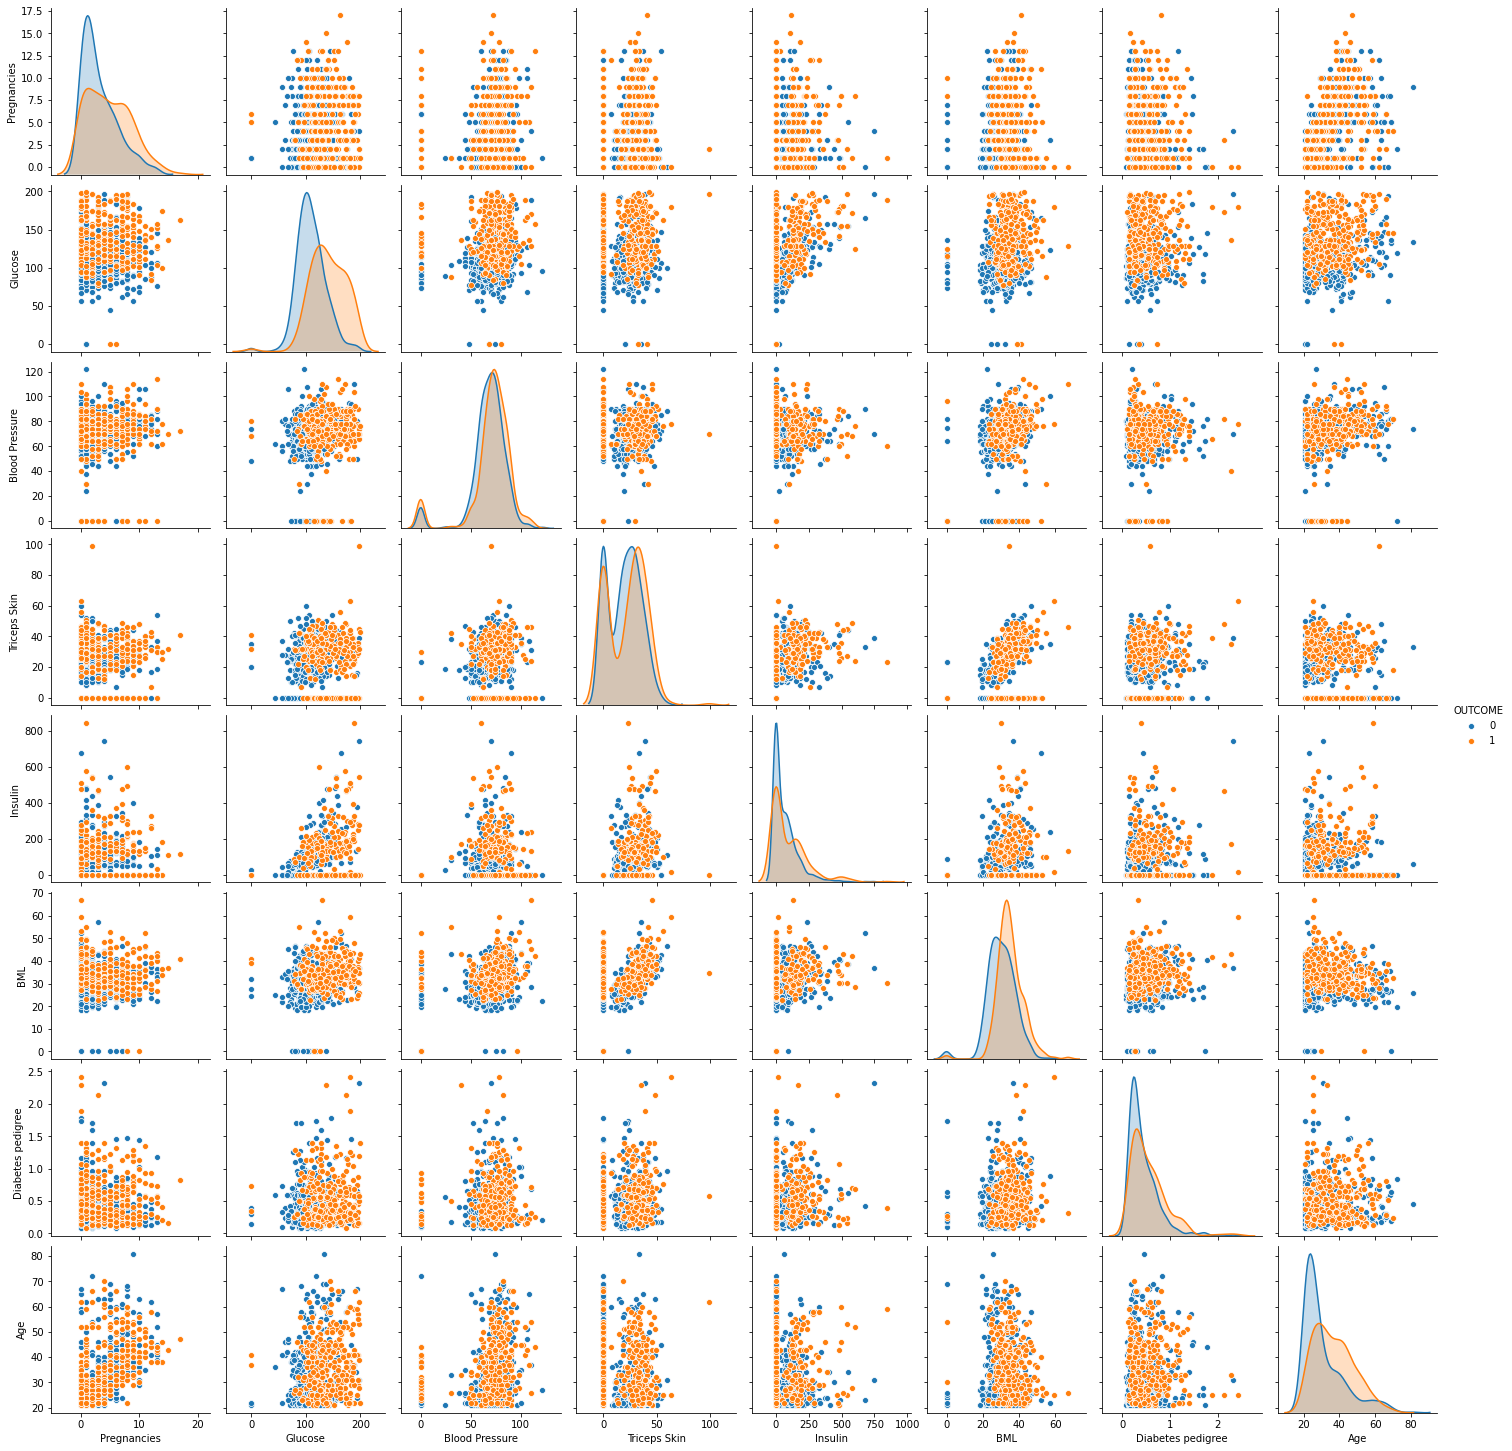

In [27]:
# Pairplot 
sns.pairplot(data = diabetes, hue = 'OUTCOME')
plt.show()

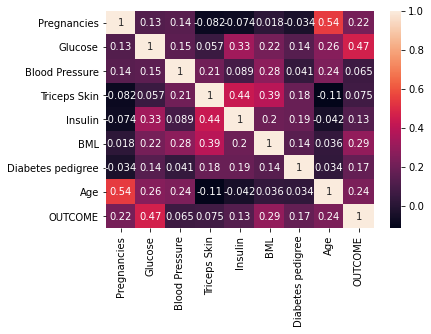

In [28]:
# Heatmap
sns.heatmap(diabetes.corr(), annot = True)
plt.show()

# In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

# Let’s also look at how many people in the dataset are diabetic and how many are not. Below is the barplot of the same:

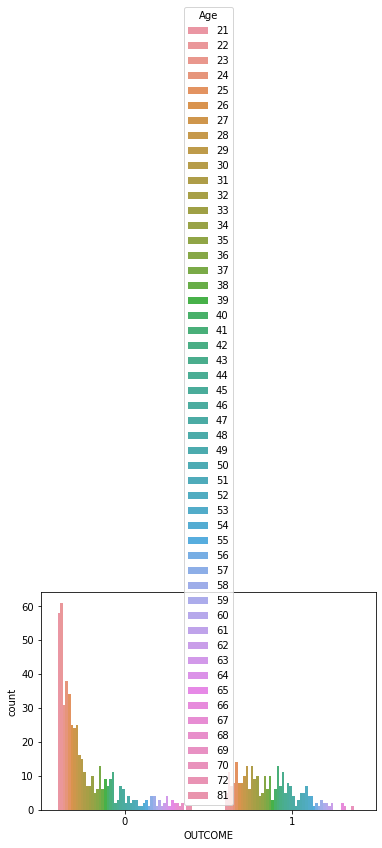

In [29]:
sns.countplot(diabetes['OUTCOME'],hue= diabetes['Age'])

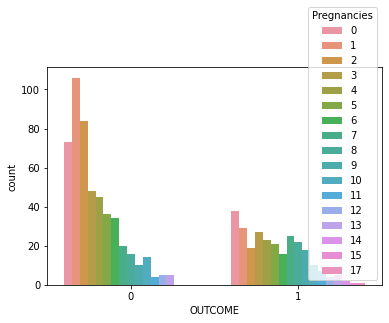

In [30]:
sns.countplot(diabetes['OUTCOME'],hue= diabetes['Pregnancies'])

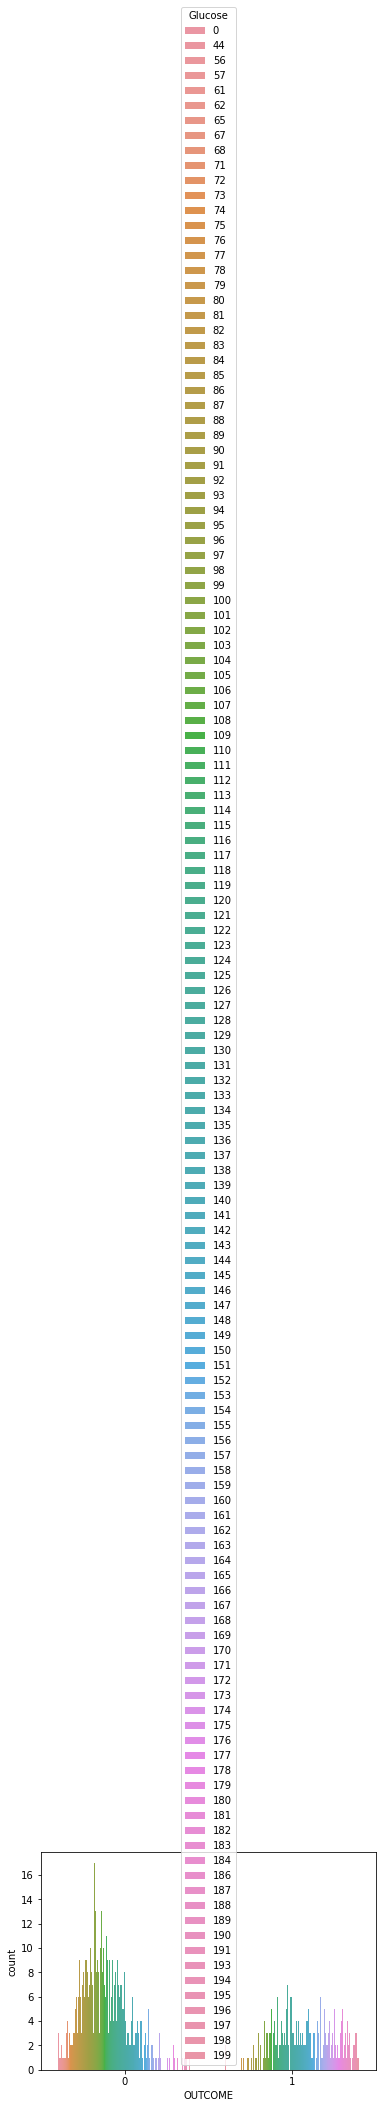

In [31]:
sns.countplot(diabetes['OUTCOME'],hue= diabetes['Glucose'])

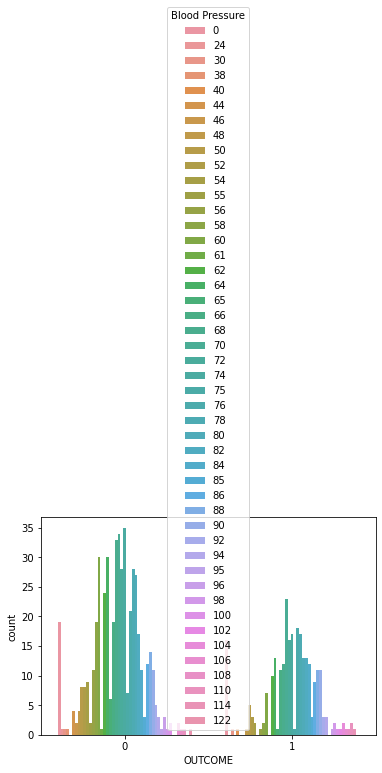

In [32]:
sns.countplot(diabetes['OUTCOME'],hue= diabetes['Blood Pressure'])

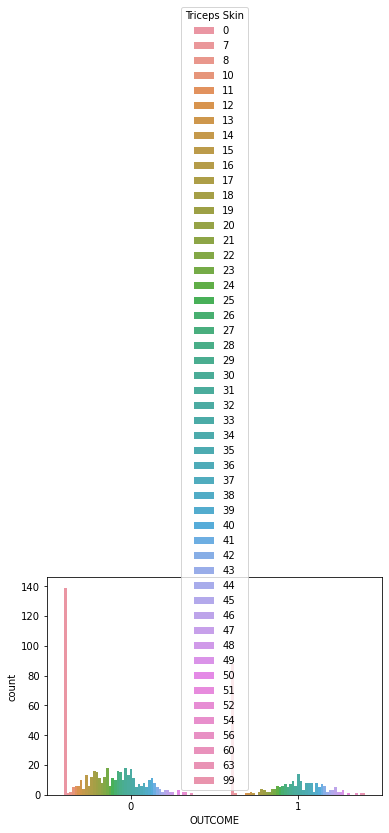

In [33]:
sns.countplot(diabetes['OUTCOME'],hue= diabetes['Triceps Skin'])

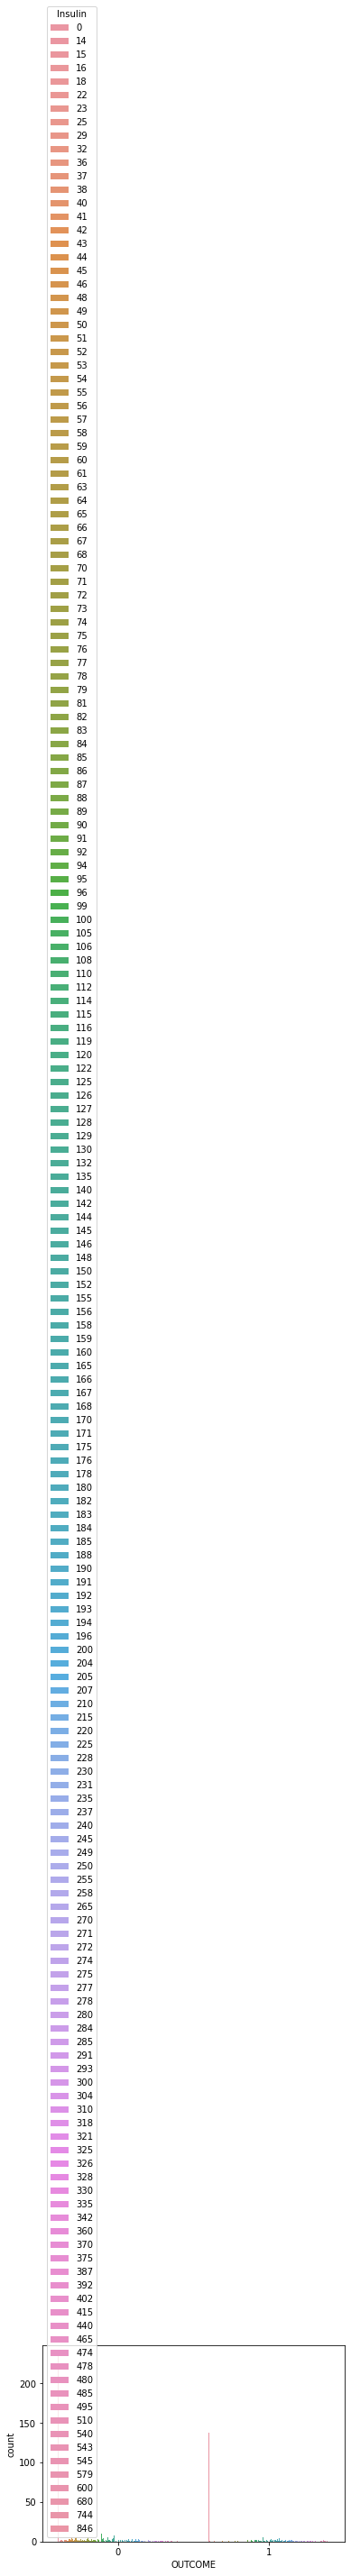

In [34]:
sns.countplot(diabetes['OUTCOME'],hue= diabetes['Insulin'])

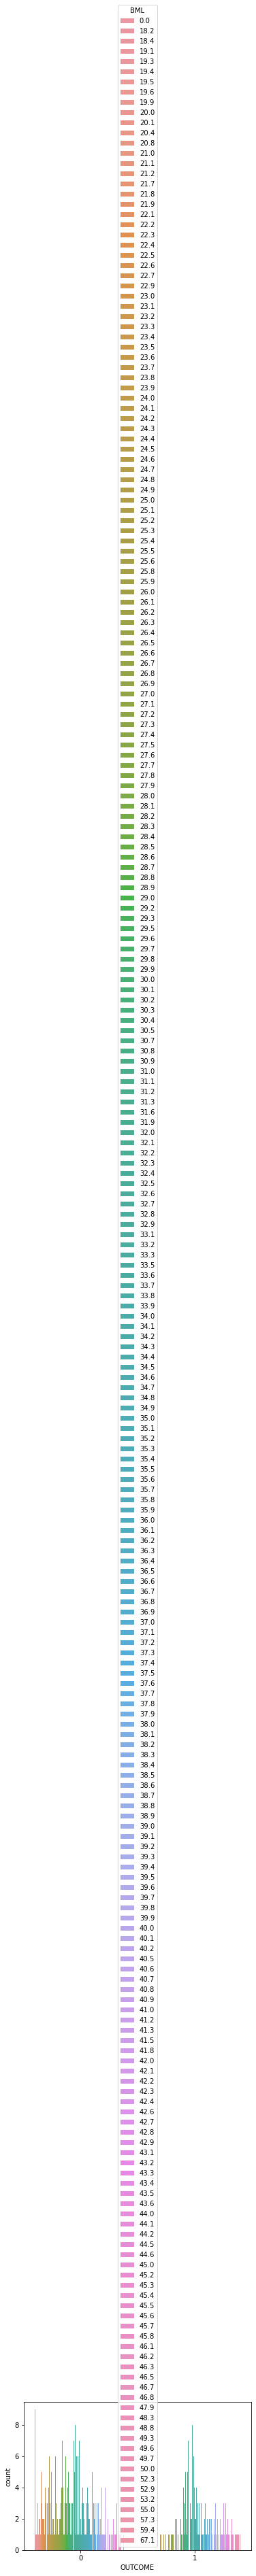

In [35]:
 sns.countplot(diabetes['OUTCOME'],hue= diabetes['BML']) 

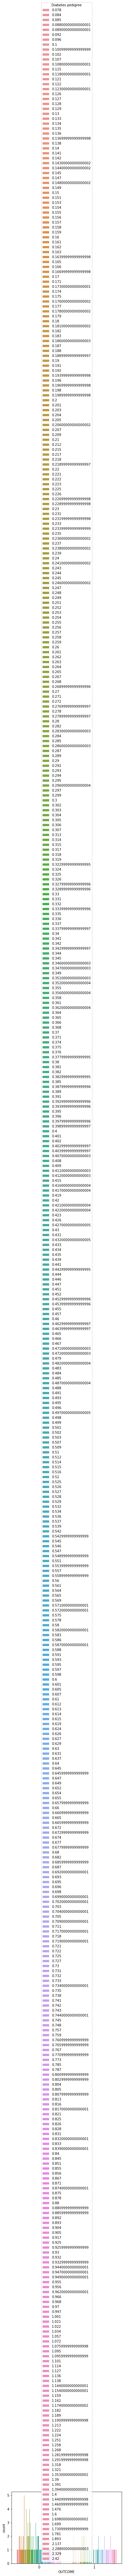

In [36]:
 sns.countplot(diabetes['OUTCOME'],hue= diabetes['Diabetes pedigree']) 

# Step 3: Data Preprocessing

In [37]:

# Count of NaN
diabetes.isnull().sum()

Pregnancies          0
Glucose              0
Blood Pressure       0
Triceps Skin         0
Insulin              0
BML                  0
Diabetes pedigree    0
Age                  0
OUTCOME              0
dtype: int64

In [38]:
# Replacing NaN with mean values
diabetes["Glucose"].fillna(diabetes["Glucose"].mean(), inplace = True)
diabetes["Blood Pressure"].fillna(diabetes["Blood Pressure"].mean(), inplace = True)
diabetes["Triceps Skin"].fillna(diabetes["Triceps Skin"].mean(), inplace = True)
diabetes["Insulin"].fillna(diabetes["Insulin"].mean(), inplace = True)
diabetes["BML"].fillna(diabetes["BML"].mean(), inplace = True)

In [70]:
# Statistical summary
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BML,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
OUTCOME,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [71]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(diabetes)

In [72]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [90]:
# Selecting features - [Pregnancies, Glucose, Blood Pressure, Triceps Skin, Insulin, BML, Diabetes pedigree, Age]
X = dataset_scaled.iloc[:,0:8].values
Y = dataset_scaled.iloc[:, 8].values

In [91]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = diabetes['OUTCOME'] )

In [92]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
Y_train shape: (614,)
Y_test shape: (154,)


# Step 4: Applying Machine Learning Model

We can now train our classification model. We’ll be using a machine simple learning model called logistic regression,KNearest Classifier and Random Forest. Since the model is readily available in sklearn, the training process is quite easy and we can do it in few lines of code. First, we create an instance called logreg and then use the fit function to train the model.

# LogisticRegression and KNeighborsClassifier

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [95]:
Y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 73.37662337662337


# k nearest classifier

In [96]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [97]:
Y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 72.72727272727273


# SVM

In [98]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [99]:

Y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 73.37662337662337


# Decision Tree

In [100]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [101]:
Y_pred_dectree = dectree.predict(X_test)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
print("Decision tree: " + str(accuracy_dectree * 100))

Decision tree: 70.12987012987013


# Random Forest

In [102]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [103]:
Y_pred_ranfor = ranfor.predict(X_test)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
print("Random Forest: " + str(accuracy_ranfor * 100))

Random Forest: 75.97402597402598


# Confusion Matrix 

In [104]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [29, 25]], dtype=int64)

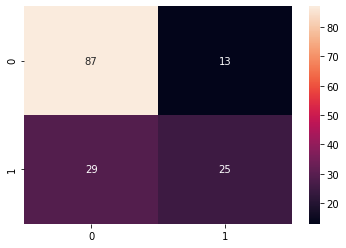

In [105]:

# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [106]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       100
         1.0       0.66      0.46      0.54        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



# Pickle

In [107]:
import pickle

In [108]:
pickle.dump(svc, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
#print(model.predict(sc.transform(np.array([[86, 66, 26.6, 31, 20, 32, 55, ]]))))

For this project will be pickling a simple dictionary. A dictionary is a list of key : value elements. 
You will save it to a file and then load again. Declare the dictionary as such:

In [109]:
pickle.dump(knn, open('Knn.pkl', 'wb'))

w means that you'll be writing to the file, and b refers to binary mode. This means that the data will be written in the form of byte objects

In [110]:
map={1:"Yes",0:"No"}

In [111]:
l=model.predict([[1,89,66,23,94,28.1,0.167,21]])

In [112]:
map

{1: 'Yes', 0: 'No'}

In [113]:
a=pickle.load(open('model.pkl','rb'))

In [120]:
b=a.predict([[1,89,1,66,94,0,0.167,21]])

In [121]:
val=int(b)
print('Diabetes predicted', map[val])


Diabetes predicted Yes
